In [1]:
import sugar_analysis as sa
try:
   import cPickle as pkl
except ModuleNotFoundError:
   import pickle as pkl
import numpy as np

# Data path

## Spectroscopic data path

In [2]:
spec_param_path = '../../sugar_model/sugar_parameters.pkl'

## Photometric data path

In [3]:
res_dict_path_sug = '../../sugar_analysis_data/resfitlc_SNf_3fB_10fR_10_sugar.pkl'
res_dict_path_salt2 = '../../sugar_analysis_data/resfitlc_SNf_3fB_10fR_10_salt2.pkl'

# Load  data

In [50]:
spec_param = pkl.load(open(spec_param_path))
param_name = ['grey','q1', 'q2', 'q3', 'Av']

pksalt2=pkl.load(open(res_dict_path_salt2))
pksug=pkl.load(open(res_dict_path_sug))
salt2_sn_list = [sn for sn in pksalt2['data'] if pksalt2['data'][sn]['res']!='fit fail']
common_sn_list = list(set(pksug['data'].keys()) & set(salt2_sn_list) & set(spec_param.keys()))

rids_sug = sa.read_input_data_SNf(select=common_sn_list, res_dict_path=res_dict_path_sug, standard='Mgr')
rids_sug.build_HD_data()
rids_salt2 = sa.read_input_data_SNf(select=common_sn_list, res_dict_path=res_dict_path_salt2, model_name='salt2', standard='log10_x0')
rids_salt2.build_HD_data()
spec_par = np.zeros_like(rids_sug.params)
cov_spec = []
for i, sn_name in enumerate(rids_sug.dic_res):
    cov_spec.append(spec_param[sn_name]['cov_q'])
    for j in range(5):
        if j==0:
            spec_par[i,j] = spec_param[sn_name][param_name[j]]+sa.distance_modulus_th(rids_sug.dic_res[sn_name]['zcmb'],rids_sug.dic_res[sn_name]['zhl'])
        else:
            spec_par[i,j] = spec_param[sn_name][param_name[j]] 

In [51]:
### Execute me if you know the value of dmgrey

#dist_mod = np.array([sa.distance_modulus_th(rids_sug.dic_res[sn_name]['zcmb'],rids_sug.dic_res[sn_name]['zhl'])
 #   for sn_name in rids_sug.dic_res])
#rids_sug.params[:,0] -= dist_mod
#rids_salt2.params[:,0] -= dist_mod

# Data format 

In [5]:
spec_par, rids_sug.params, rids_salt2

(array([[ 3.67151189e+01, -1.34518262e+00, -6.73701928e-01,
          7.04361483e-01, -1.95883513e-01],
        [ 3.56845678e+01, -7.79461749e-01, -2.23556277e+00,
         -1.19420054e+00, -1.32677922e-01],
        [ 3.49392843e+01, -1.85545102e+00, -2.73162976e+00,
          2.45295288e-01,  5.11429393e-02],
        [ 3.75136427e+01,  1.28145989e+00,  5.32313540e-01,
         -1.89607975e+00, -7.08125277e-02],
        [ 3.60817318e+01, -2.12483311e+00, -1.79392361e+00,
         -2.12980385e-01, -1.37741470e-01],
        [ 3.75215409e+01, -4.82576701e-01, -3.09877049e+00,
          4.03583216e-01,  2.97128077e-02],
        [ 3.77018634e+01, -2.37087085e+00,  2.20665451e+00,
         -4.90326629e-01, -1.84209942e-01],
        [ 3.70319791e+01,  1.99957410e+00,  5.91610966e-01,
         -1.78912407e+00, -7.49349302e-02],
        [ 3.75026187e+01, -2.20406922e+00,  1.13157862e+00,
         -1.25224739e-01, -1.88070563e-01],
        [ 3.51131120e+01,  4.36678133e-01,  1.28660267e+00,
    

In [6]:
cov_spec, rids_sug.cov_list, rids_salt2.cov_list

([array([[ 2.53798694e-06, -2.09577636e-06,  5.70438731e-06,
           3.26023095e-06,  8.53626556e-06],
         [-2.09577636e-06,  2.68236986e-06, -1.25347102e-05,
           1.30160606e-06, -6.08280062e-06],
         [ 5.70438731e-06, -1.25347102e-05,  1.30292937e-04,
           6.58028060e-06,  5.57726706e-05],
         [ 3.26023095e-06,  1.30160606e-06,  6.58028060e-06,
           2.18570857e-04,  1.13532374e-05],
         [ 8.53626556e-06, -6.08280062e-06,  5.57726706e-05,
           1.13532374e-05,  8.99446290e-05]]),
  array([[ 1.39949132e-06, -1.11349104e-06,  2.56819792e-06,
           2.49555756e-06,  5.10348801e-06],
         [-1.11349104e-06,  1.60057970e-06, -8.56948354e-06,
           4.16206901e-07, -3.42085338e-06],
         [ 2.56819792e-06, -8.56948354e-06,  1.04409135e-04,
           1.45416057e-05,  3.69877447e-05],
         [ 2.49555756e-06,  4.16206901e-07,  1.45416057e-05,
           1.54392574e-04,  1.75803860e-05],
         [ 5.10348801e-06, -3.42085338e-06, 

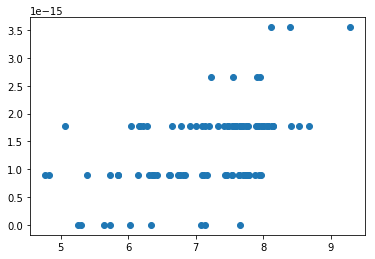

In [7]:
import matplotlib.pyplot as plt
#check that Mgr is -2.5 log10 (x0)
rids_salt2_alt = sa.read_input_data_SNf(select=common_sn_list, res_dict_path=res_dict_path_salt2, model_name='salt2', standard='x0')
rids_salt2_alt.build_HD_data()
plt.plot(rids_salt2.params[:,0],rids_salt2.params[:,0]+2.5/np.log(10)*np.log(rids_salt2_alt.params[:,0]),'o')

### Plot the correspondances

In [52]:
import matplotlib.pyplot as plt

In [53]:
cov_spec = np.array(cov_spec)
rids_sug.cov_list = np.array(rids_sug.cov_list)
rids_salt2.cov_list = np.array(rids_salt2.cov_list)

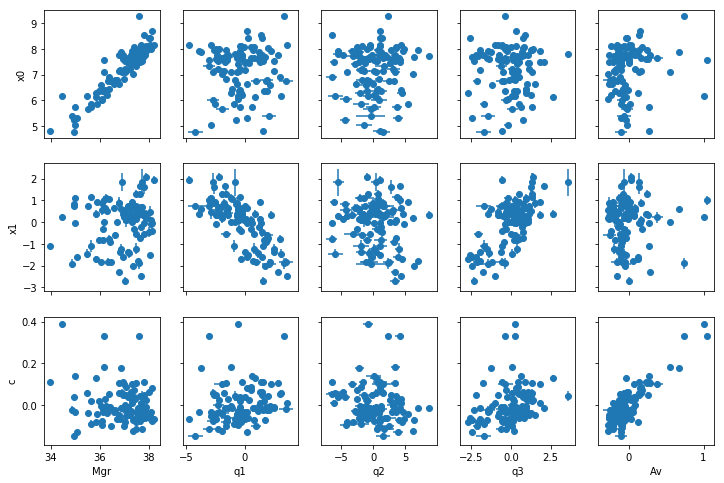

In [54]:
label_sug=['$\Delta$M','q1','q2','q3','Av']
label_salt=['logX0','x1','c']

nx = len(rids_sug.params[0])
ny = len(rids_salt2.params[0])
fig, axes = plt.subplots(ny, nx, sharex='col', sharey='row', figsize=(12, 8))

for i in range(nx):
    for j in range(ny):
        ax = axes[j,i]
        ax.errorbar(rids_sug.params[:,i],rids_salt2.params[:,j],
             xerr = np.sqrt(rids_sug.cov_list[:,i,i]), 
             yerr = np.sqrt(rids_salt2.cov_list[:,j,j]),fmt='o')
        if j==ny-1:
            ax.set_xlabel(rids_sug.param_name[i])
        if i==0:
            ax.set_ylabel(rids_salt2.param_name[j])

### Make the fit

$\chi^2 = \sum (X - AQ)^T W (X - AQ)$

Where $X$ is salt2 paramters, $Q$ is sugar Parameters, $A$ the correspondance matrix to be fitted, and $W$ a weight matrix

Q is (1,q...). I other words, 1st parameter is the constant

If $W$ is the same for everyone, it doesn't count in the fit !!

Then, $A = \sum(Q Q^T)^{-1}\sum Q X^T$

In [55]:
nlines,ncol = np.shape(rids_sug.params)
Q = np.ones((nlines, ncol+1))
Q[:,1:]=rids_sug.params

In [56]:
sQQT = Q.T.dot(Q)
sQXt = Q.T.dot(rids_salt2.params)
A = np.linalg.inv(sQQT).dot(sQXt)
salt2_guess = Q.dot(A) 

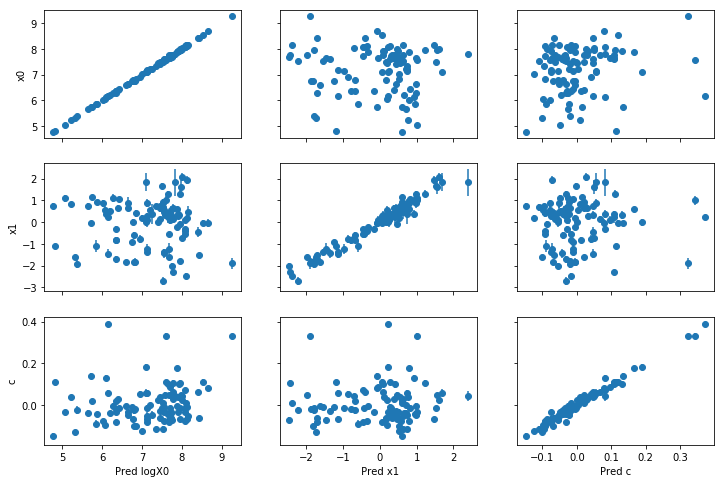

In [57]:
#label_sug=['$\Delta$M','q1','q2','q3','Av']
label_salt=['logX0','x1','c']
label_guess=['Pred logX0',' Pred x1','Pred c']

#nx = len(rids_sug.params[0])
ny = len(rids_salt2.params[0])
fig, axes = plt.subplots(ny, ny, sharex='col', sharey='row', figsize=(12, 8))

for i in range(ny):
    for j in range(ny):
        ax = axes[j,i]
        ax.errorbar(salt2_guess[:,i],rids_salt2.params[:,j],
             #xerr = np.sqrt(rids_sug.cov_list[:,i,i]), 
             yerr = np.sqrt(rids_salt2.cov_list[:,j,j]),fmt='o')
        if j==ny-1:
            ax.set_xlabel(label_guess[i])
        if i==0:
            ax.set_ylabel(rids_salt2.param_name[j])

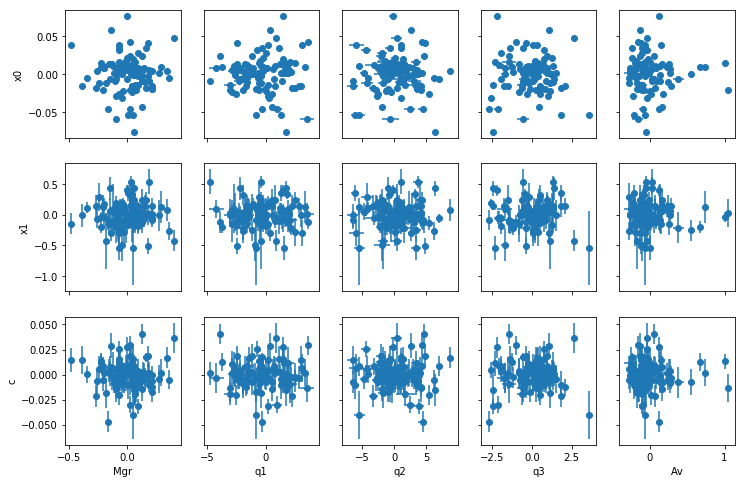

In [41]:
label_sug=['$\Delta$M','q1','q2','q3','Av']
label_salt=['logX0','x1','c']

nx = len(rids_sug.params[0])
ny = len(rids_salt2.params[0])
fig, axes = plt.subplots(ny, nx, sharex='col', sharey='row', figsize=(12, 8))

for i in range(nx):
    for j in range(ny):
        ax = axes[j,i]
        ax.errorbar(rids_sug.params[:,i],rids_salt2.params[:,j]-salt2_guess[:,j],
             xerr = np.sqrt(rids_sug.cov_list[:,i,i]), 
             yerr = np.sqrt(rids_salt2.cov_list[:,j,j]),fmt='o')
        if j==ny-1:
            ax.set_xlabel(rids_sug.param_name[i])
        if i==0:
            ax.set_ylabel(rids_salt2.param_name[j])

In [42]:
np.std(rids_salt2.params-salt2_guess,axis=0)

array([0.02392323, 0.21102734, 0.01385918])

In [43]:
A

array([[-2.96652123e+01, -1.38160821e-01,  1.16716633e-02],
       [ 1.04499114e+00, -3.84629788e-01,  2.40416275e-02],
       [ 9.64435903e-02, -4.18203468e-01,  1.63152285e-02],
       [-2.03123350e-02, -3.18936979e-02, -2.20468589e-03],
       [-4.05394162e-02,  5.57955866e-01,  2.72523824e-02],
       [ 1.41556731e+00, -1.10563823e-01,  3.66062546e-01]])

In [20]:
rids_salt2.cov_list

array([[[ 8.60346518e-09, -3.46953120e-06, -4.04072125e-07],
        [-3.46953120e-06,  6.13393188e-02,  1.72192936e-03],
        [-4.04072125e-07,  1.72192936e-03,  1.90682790e-04]],

       [[ 3.60958231e-08, -1.00065935e-05, -1.00446722e-06],
        [-1.00065935e-05,  7.15826984e-02,  2.56829851e-03],
        [-1.00446722e-06,  2.56829851e-03,  2.37886986e-04]],

       [[ 4.26196758e-08, -2.41377762e-06, -6.11483973e-07],
        [-2.41377762e-06,  7.63480364e-03,  2.10422597e-04],
        [-6.11483973e-07,  2.10422597e-04,  6.50492856e-05]],

       [[ 9.67827413e-10,  1.60890210e-07, -7.39658214e-08],
        [ 1.60890210e-07,  5.68769304e-03, -1.07466245e-04],
        [-7.39658214e-08, -1.07466245e-04,  1.00682503e-04]],

       [[ 3.25670576e-08,  6.85011360e-07, -6.41910661e-07],
        [ 6.85011360e-07,  5.01586674e-02,  8.11895246e-04],
        [-6.41910661e-07,  8.11895246e-04,  1.54192102e-04]],

       [[ 6.92470745e-10, -2.97203839e-07, -7.58118362e-08],
        [-2.97

In [21]:
rids_salt2_x0 = sa.read_input_data_SNf(select=common_sn_list, res_dict_path=res_dict_path_salt2, model_name='salt2', standard='x0')
rids_salt2_x0.build_HD_data()

In [22]:
np.array([np.diag(cov) for cov in rids_salt2_x0.cov_list])

array([[1.19146528e-09, 6.13393188e-02, 1.90682790e-04],
       [5.68623241e-09, 7.15826984e-02, 2.37886986e-04],
       [7.47825275e-09, 7.63480364e-03, 6.50492856e-05],
       [1.12108307e-10, 5.68769304e-03, 1.00682503e-04],
       [4.96482935e-09, 5.01586674e-02, 1.54192102e-04],
       [8.05885759e-11, 1.88235573e-02, 9.61300827e-05],
       [2.13795764e-10, 2.22072898e-02, 1.26021677e-04],
       [2.01131569e-10, 3.75975185e-02, 1.57404988e-04],
       [4.96432542e-10, 1.46591471e-02, 1.33629210e-04],
       [5.23124402e-09, 5.10411036e-03, 5.95465546e-05],
       [4.54910172e-11, 1.32297392e-02, 9.81488274e-05],
       [1.14810695e-10, 1.67220133e-02, 1.05982408e-04],
       [1.35672662e-10, 1.51083498e-02, 7.78020873e-05],
       [7.68849288e-11, 2.62141739e-02, 8.72743277e-05],
       [1.08202841e-10, 1.94779298e-02, 9.74905909e-05],
       [5.75067764e-10, 1.37673321e-02, 9.36921881e-05],
       [5.74441168e-10, 5.15440139e-02, 2.09968436e-04],
       [1.44629995e-10, 5.55402

In [23]:
rids_salt2_x0.params[:,0]

array([0.00218634, 0.00458495, 0.0079498 , 0.00065993, 0.00383152,
       0.00068288, 0.00096161, 0.00096602, 0.00117224, 0.00761011,
       0.00055142, 0.00063806, 0.0008006 , 0.00077347, 0.00077685,
       0.0019474 , 0.00140101, 0.00093572, 0.00058927, 0.00347315,
       0.00076992, 0.00301561, 0.00095898, 0.00131478, 0.00058731,
       0.00077689, 0.0009342 , 0.00092123, 0.00513312, 0.00102495,
       0.0007873 , 0.00038722, 0.00082513, 0.00289702, 0.00043129,
       0.00336683, 0.00088313, 0.00284944, 0.00144417, 0.00056129,
       0.00066761, 0.00184378, 0.00069955, 0.00135268, 0.0005644 ,
       0.00104047, 0.0032571 , 0.00225573, 0.00509663, 0.00198135,
       0.00019335, 0.00064336, 0.00069051, 0.0094668 , 0.00157335,
       0.01232763, 0.00087664, 0.00170303, 0.00279612, 0.00086066,
       0.00139467, 0.00189491, 0.00344427, 0.0020126 , 0.00146439,
       0.01177472, 0.00062053, 0.00095318, 0.00085813, 0.00197367,
       0.00082803, 0.0006522 , 0.0045936 , 0.00551282, 0.00059